## Mustafa Habibi


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Lligues europees UEFA.csv', encoding="latin-1", sep=';')
pd.set_option('display.max_columns', None);

##### Here's the breakdown of the column names in the given example:

- 'Rk': Represents a column containing ranks.
- 'Squad': Represents a column containing the names of squads or teams.
- 'Country': Represents a column containing country names.
- 'LgRk': Represents a column containing league ranks.
- 'MP': Represents a column containing the number of matches played.
- 'W': Represents a column containing the number of wins.
- 'D': Represents a column containing the number of draws.
- 'L': Represents a column containing the number of losses.
- 'GF': Represents a column containing the number of goals for.
- 'GA': Represents a column containing the number of goals against.
- 'GD': Represents a column containing the goal difference (GF - GA).
- 'Pts': Represents a column containing the total points.
- 'Pts/G': Represents a column containing the points per game.
- 'xG': Represents a column containing expected goals.
- 'xGA': Represents a column containing expected goals against.
- 'xGD': Represents a column containing expected goal difference.
- 'xGD/90': Represents a column containing expected goal difference per 90 minutes.
- 'Last 5': Represents a column containing information about the last 5 matches.
- 'Attendance': Represents a column containing attendance figures.
- 'Top Team Scorer': Represents a column containing the top goal scorer for a team.
- 'Goalkeeper': Represents a column containing the goalkeeper for a team.

In [3]:
df

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,-41,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,-35,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,-56,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


In [4]:
df.columns

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

In [5]:
df['Squad'].unique()

array(['Manchester City', 'Liverpool', 'Real Madrid', 'Bayern Munich',
       'Paris S-G', 'Milan', 'Inter', 'Napoli', 'Dortmund', 'Barcelona',
       'Chelsea', 'Juventus', 'Leverkusen', 'Monaco', 'Tottenham',
       'Marseille', 'Atlético Madrid', 'Arsenal', 'Sevilla', 'Rennes',
       'Betis', 'Lazio', 'RB Leipzig', 'Strasbourg', 'Nice',
       'Union Berlin', 'Real Sociedad', 'Lens', 'Fiorentina', 'Roma',
       'Freiburg', 'Atalanta', 'Lyon', 'Manchester Utd', 'Köln',
       'Villarreal', 'West Ham', 'Athletic Club', 'Nantes', 'Lille',
       'Hellas Verona', 'Wolves', 'Torino', 'Mainz 05', 'Sassuolo',
       'Hoffenheim', 'Leicester City', "M'Gladbach", 'Brighton', 'Brest',
       'Osasuna', 'Crystal Palace', 'Celta Vigo', 'Reims',
       'Eint Frankfurt', 'Brentford', 'Wolfsburg', 'Bochum',
       'Aston Villa', 'Valencia', 'Udinese', 'Newcastle Utd',
       'Montpellier', 'Bologna', 'Rayo Vallecano', 'Augsburg', 'Espanyol',
       'Southampton', 'Getafe', 'Elche', 'Angers', 'Em

In [6]:
df['Country'].unique()

array(['ENG', 'ESP', 'GER', 'FRA', 'ITA'], dtype=object)

In [7]:
df.describe().round(2)

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00
mean,49.50,10.32,36.31,13.45,9.41,13.45,50.88,50.88,0.00,49.73,1.37,48.65,48.65,-0.01,0.00,24239.86
std,28.43,5.71,1.15,5.75,2.90,5.12,16.10,13.63,26.50,16.17,0.44,12.45,9.81,19.99,0.55,14874.17
min,1.00,1.00,34.00,3.00,3.00,2.00,23.00,24.00,-56.00,18.00,0.53,28.20,26.80,-40.40,-1.09,5870.00
25%,25.25,5.25,36.00,9.00,7.00,10.00,39.00,40.00,-17.75,37.00,1.00,39.10,41.30,-13.58,-0.36,12355.50
50%,49.50,10.00,37.00,13.00,9.00,13.00,47.00,50.00,-1.00,46.00,1.30,46.45,47.75,-1.10,-0.03,20491.00
75%,73.75,15.00,37.00,17.00,11.00,17.00,60.00,59.00,17.25,61.75,1.69,55.55,54.70,12.80,0.36,32382.00
max,98.00,20.00,37.00,28.00,16.00,26.00,97.00,89.00,72.00,90.00,2.43,88.10,73.30,59.30,1.60,73150.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [9]:
df.isnull().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [10]:
df.isna().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rk,98.0,49.500000,28.434134,1.00,25.250,49.50,73.750,98.00
LgRk,98.0,10.316327,5.706926,1.00,5.250,10.00,15.000,20.00
MP,98.0,36.306122,1.152390,34.00,36.000,37.00,37.000,37.00
W,98.0,13.448980,5.747474,3.00,9.000,13.00,17.000,28.00
D,98.0,9.408163,2.903381,3.00,7.000,9.00,11.000,16.00
L,98.0,13.448980,5.123470,2.00,10.000,13.00,17.000,26.00
GF,98.0,50.877551,16.102933,23.00,39.000,47.00,60.000,97.00
GA,98.0,50.877551,13.634602,24.00,40.000,50.00,59.000,89.00
GD,98.0,0.000000,26.501896,-56.00,-17.750,-1.00,17.250,72.00
Pts,98.0,49.734694,16.166371,18.00,37.000,46.00,61.750,90.00


In [12]:
df.describe(include = ['O']).T

,count,unique,top,freq
Squad,98,98,Manchester City,1
Country,98,5,ENG,20
Last 5,98,80,W W W L L,4
Top Team Scorer,98,98,Kevin De Bruyne - 15,1
Goalkeeper,98,98,Ederson,1


In [13]:
df.columns

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [15]:
df.describe().round(2)

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00
mean,49.50,10.32,36.31,13.45,9.41,13.45,50.88,50.88,0.00,49.73,1.37,48.65,48.65,-0.01,0.00,24239.86
std,28.43,5.71,1.15,5.75,2.90,5.12,16.10,13.63,26.50,16.17,0.44,12.45,9.81,19.99,0.55,14874.17
min,1.00,1.00,34.00,3.00,3.00,2.00,23.00,24.00,-56.00,18.00,0.53,28.20,26.80,-40.40,-1.09,5870.00
25%,25.25,5.25,36.00,9.00,7.00,10.00,39.00,40.00,-17.75,37.00,1.00,39.10,41.30,-13.58,-0.36,12355.50
50%,49.50,10.00,37.00,13.00,9.00,13.00,47.00,50.00,-1.00,46.00,1.30,46.45,47.75,-1.10,-0.03,20491.00
75%,73.75,15.00,37.00,17.00,11.00,17.00,60.00,59.00,17.25,61.75,1.69,55.55,54.70,12.80,0.36,32382.00
max,98.00,20.00,37.00,28.00,16.00,26.00,97.00,89.00,72.00,90.00,2.43,88.10,73.30,59.30,1.60,73150.00


#### Exercise 1
Download the attached dataset of official UEFA data and select an attribute from the dataset. Calculate the p-value and say whether it rejects the null hypothesis by taking an alpha of 5%.

- H0: Number of goals against (GD) has a Gaussian distribution.
- H1: Number of goals against (GD) does not have a Gaussian distribution.

In [16]:
stat, p = shapiro(df.GA)
print('stat=%.3f, p=%.3f' % (stat, p))
print('El p-value es:', p)

print('-------------')

if p > 0.05:
    print('Probably Gaussian(h0)')
else:
    print('Probably not Gaussian(h1)')

stat=0.983, p=0.243
El p-value es: 0.2431538999080658
-------------
Probably Gaussian(h0)


In [17]:
from scipy.stats import normaltest
data = df.GA
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=2.728, p=0.256
Probably Gaussian


We have Gaussian in the number of goals againt. It means there is no outliers. and also the null hyputher comes true. 

### Exercise 2
With the same dataset select two other attributes from the dataset. Calculate the p-values ​​and say whether they reject the null hypothesis by taking an alpha of 5%.

In [18]:
sample_GA_mean= df['GA'].mean()
sample_xGA_mean= df['xGA'].mean()
sample_size= len(df)
sample_std = np.std(df['GA'], ddof=1)

In [19]:
print("Sample Mean:", sample_GA_mean)
print('Sample expexted mean', sample_xGA_mean)
print("Sample Standard Deviation:", sample_std)
print("Sample Size:", sample_size)

Sample Mean: 50.87755102040816
Sample expexted mean 48.64591836734695
Sample Standard Deviation: 13.634602210765951
Sample Size: 98


In [20]:
stat, p = shapiro(df.xGA)
print('stat=%.3f, p=%.3f' % (stat, p))
print('El p-value es:', p)

print('-------------')

if p > 0.05:
    print('Probably Gaussian(h0)')
else:
    print('Probably not Gaussian(h1)')

stat=0.989, p=0.610
El p-value es: 0.609533429145813
-------------
Probably Gaussian(h0)


In [21]:
stat, p = shapiro(df.GA)
print('stat=%.3f, p=%.3f' % (stat, p))
print('El p-value es:', p)

print('-------------')

if p > 0.05:
    print('Probably Gaussian(h0)')
else:
    print('Probably not Gaussian(h1)')

stat=0.983, p=0.243
El p-value es: 0.2431538999080658
-------------
Probably Gaussian(h0)


- H0: the GA and xGA have the same distributions.
- H1: the GA and xGA have differenct distributions.

In [22]:
data1 = df.xGA
data2 = df.GA
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=-1.315, p=0.190
Probably the same distribution


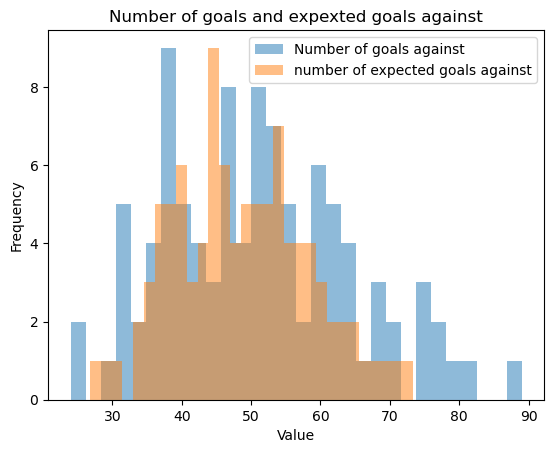

In [23]:
GA = df.GA
xGA = df.xGA

# Plotting the histograms
plt.hist(GA, bins=30, alpha=0.5, label='Number of goals against')
plt.hist(xGA, bins=30, alpha=0.5, label='number of expected goals against')

# Add labels and a legend
plt.title('Number of goals and expexted goals against')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

### Exercise 3
Continue with the attached dataset and select three attributes from the dataset. Calculate the p-value and say whether it rejects the null hypothesis by taking an alpha of 5%.

In statistical hypothesis testing, the p-value is a measure of the evidence against a null hypothesis. In this case, the null hypothesis states that there is no significant difference between three distributions being compared.

- Null Hypothesis (H0): The means of all the number of losses (L) from which the three countries (Spain, France and England)  (data1, data2, and data3) were sampled are equal.

- Alternative Hypothesis (HA): At least one of the population means is different from the others.

In [24]:
Spain= df.loc[df['Country'] == 'ESP']
France= df.loc[df['Country'] == 'FRA']
England= df.loc[df['Country'] == 'ENG']

In [25]:
stat, p = shapiro(Spain.L)
print('stat=%.3f, p=%.3f' % (stat, p))
print('El p-value es:', p)

print('-------------')

if p > 0.05:
    print('Probably Gaussian(h0)')
else:
    print('Probably not Gaussian(h1)')

stat=0.967, p=0.700
El p-value es: 0.6998037695884705
-------------
Probably Gaussian(h0)


In [26]:
stat, p = shapiro(France.L)
print('stat=%.3f, p=%.3f' % (stat, p))
print('El p-value es:', p)

print('-------------')

if p > 0.05:
    print('Probably Gaussian(h0)')
else:
    print('Probably not Gaussian(h1)')

stat=0.927, p=0.135
El p-value es: 0.13514550030231476
-------------
Probably Gaussian(h0)


In [27]:
stat, p = shapiro(England.L)
print('stat=%.3f, p=%.3f' % (stat, p))
print('El p-value es:', p)

print('-------------')

if p > 0.05:
    print('Probably Gaussian(h0)')
else:
    print('Probably not Gaussian(h1)')

stat=0.962, p=0.585
El p-value es: 0.5849959254264832
-------------
Probably Gaussian(h0)


In [28]:
from scipy.stats import f_oneway
data1 = Spain.L
data2 = France.L
data3 = England.L
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=0.146, p=0.864
Probably the same distribution


Conclution:There is no evidence to reject the null hypothesis. This means that the observed data is consistent with the assumption that the three distributions are the same.